In [1]:
from grcore.coco.dataset import CocoDataset
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import Counter
from fridgecore.coco import FridgeDataset
from plotutils import get_params, set_style, to_defaults, tex_escape, save_fig, gen_img_grid, cmap, colors, cmap, title_case
import seaborn as sns
from dhop.dataset import Parts2WholesDataset
from rich.jupyter import print
from pathlib import Path
from common import *

In [2]:
%pprint

Pretty printing has been turned OFF


## Params

In [3]:
dsetname = "fridgenet-rdv3"
ttype = "test"
additional = ""

In [4]:
DSETNAME = {"carparts", "pascalparts", "personparts", "grmix", "fridgenet-sdv3", "fridgenet-rdv3"}

In [5]:
# carparts
assert dsetname in DSETNAME

if dsetname == "carparts":
    supercats = ["car"]
    dsetpath = "car-parts-segmentation"
    subset = "ocln"

# pascalparts person
elif dsetname == "personparts":
    supercats=["person"]
    dsetpath = "pascal"
    subset = "pascalparts_person"

# grmix
elif dsetname == "grmix":
    supercats = ["person", "car"]
    dsetpath = "grmix"
    subset = "orig"
    
elif dsetname == "fridgenet-sdv3":
    supercats = ["bottle_water", "broccoli", "yogurt", "pepper_sweet", "jelly", "juice"]
    dsetpath = "fridge"
    subset = "fridgenet-sdv3"
elif dsetname == "fridgenet-rdv3":
    supercats = ["bottle_water", "broccoli", "yogurt", "pepper_sweet", "jelly", "juice"]
    dsetpath = "fridge"
    subset = "fridgenet-rdv3"
else:
    raise NotImplementedError()


In [6]:
rootpath = "/data/dataset"

## Coco dataset

In [7]:
# Import dataset
wholes_path = Path(rootpath) / dsetpath / subset / "annotations"/ f"{ttype}_wholes{additional}.json"
parts_path = Path(rootpath) / dsetpath / subset / "annotations"/ f"{ttype}_parts{additional}.json"

dset = FridgeDataset(CocoDataset(wholes_path, dset_type=ttype))
pdset = None
if parts_path.exists():
    pdset = FridgeDataset(CocoDataset(parts_path, dset_type=ttype))
print(f"Root path: {dset.root_path}")
print(f"gt path: {dset.gt_path}")
if pdset:
    print(f"dt path: {pdset.gt_path}")

if not pdset:
    print("No pdset")

loading annotations into memory...

Loading json: /data/dataset/fridge/fridgenet-rdv3/annotations/test_wholes.json


Done 0.36s

creating index...
index created!


Root path: /data/dataset/fridge/fridgenet-rdv3

gt path: /data/dataset/fridge/fridgenet-rdv3/annotations/test_wholes.json

No pdset

### Categories

In [8]:
catdf = pd.DataFrame.from_dict(dset.cats.values())
print(catdf)

id            name   supercategory  is_whole  has_parts
0    1    bottle_water    bottle_water      True       True
1    2          bottom    bottle_water     False      False
2    3           label    bottle_water     False      False
3    4           water    bottle_water     False      False
4    5            neck    bottle_water     False      False
5    6             cap    bottle_water     False      False
6    7           bread           bread      True      False
7    8        broccoli        broccoli      True       True
8    9           stalk        broccoli     False      False
9   10         florets        broccoli     False      False
10  11          butter          butter      True      False
11  12         cabbage         cabbage      True      False
12  13          carrot          carrot      True      False
13  14          cheese          cheese      True      False
14  15          chilli          chilli      True      False
15  16            coke            coke      True      False
16  17       courgette       courgette      True      False
17  18  cream_whipping  cream_whipping      True      False
18  19        cucumber        cucumber      True      False
19  20            eggs            eggs      True      False
20  21   extract_yeast   extract_yeast      True      False
21  22     food_canned     food_canned      True      False
22  23          garlic          garlic      True      False
23  24           jelly           jelly      True       True
24  25          bottom           jelly     False      False
25  26             cap           jelly     False      False
26  27           label           jelly     False      False
27  28             top           jelly     False      False
28  29           juice           juice      True       True
29  30          carton           juice     False      False
30  31             top           juice     False      False
31  32    bottle_juice    bottle_juice      True      False
32  33         ketchup         ketchup      True      False
33  34         lettuce         lettuce      True      False
34  35           melon           melon      True      False
35  36            milk            milk      True      False
36  37           onion           onion      True      False
37  38    pepper_sweet    pepper_sweet      True       True
38  39            body    pepper_sweet     False      False
39  40            stem    pepper_sweet     False      False
40  41         pumpkin         pumpkin      True      False
41  42          radish          radish      True      False
42  43         ricotta         ricotta      True      False
43  44          salami          salami      True      False
44  45          salmon          salmon      True      False
45  46           sauce           sauce      True      False
46  47           steak           steak      True      False
47  48     sticks_fish     sticks_fish      True      False
48  49         tabasco         tabasco      True      False
49  50          tomato          tomato      True      False
50  51         witloof         witloof      True      False
51  52          yogurt          yogurt      True       True
52  53            text          yogurt     False      False
53  54             lid          yogurt     False      False

In [9]:
# If categories are equal
if pdset:
    check_equal_wp(dset, pdset, "cats")

### Annotations

In [10]:
check_catids_in_anns(dset, "wholes")
if pdset:
    check_catids_in_anns(pdset, "parts")

wholes False

Missing 13 ids in annotations: {34, 35, 37, 7, 42, 12, 45, 47, 48, 18, 50, 51, 21}

AssertionError: 

In [12]:
if pdset:
    pdset.get_partcat_ids()

In [13]:
check_imgids_in_anns(dset, "wholes")
if pdset:
    check_imgids_in_anns(pdset, "parts")

Wholes True

#### Number of occluded annotations

In [14]:
check_ocln_anns(dset)


all:Counter({29: 198, 24: 152, 38: 130, 1: 91, 52: 75, 32: 34, 8: 22, 22: 9, 16: 9, 15: 7, 
44: 4, 49: 4, 14: 4, 23: 4, 13: 3, 43: 3, 36: 3, 11: 2, 33: 2, 17: 2, 19: 2, 41: 1, 20: 1, 
46: 1})

ocln:Counter({29: 169, 24: 122, 38: 97, 1: 69, 52: 37, 32: 15, 8: 11, 44: 4, 15: 3, 49: 1, 
17: 1, 23: 1, 43: 1, 33: 1, 14: 1, 22: 1})

non-ocln: Counter({52: 38, 38: 33, 24: 30, 29: 29, 1: 22, 32: 19, 8: 11, 16: 9, 22: 8, 15: 4,
49: 3, 14: 3, 23: 3, 13: 3, 36: 3, 11: 2, 43: 2, 19: 2, 33: 1, 17: 1, 41: 1, 20: 1, 46: 1, 
44: 0})

#### Number of instances on images

In [15]:
# Number of instances on images
for catid, cat in dset.wholecats.items():
    all_annids = Counter()
    imgids = dset.get_imgids([catid])
    for imgid in imgids:
        annids = dset.get_annids([catid], [imgid])
        all_annids.update([len(annids)])
    print(f"{cat['name']}:{all_annids}")

bottle_water:Counter({1: 23, 2: 22, 3: 8})

bread:Counter()

broccoli:Counter({1: 20, 2: 1})

butter:Counter({1: 2})

cabbage:Counter()

carrot:Counter({2: 1, 1: 1})

cheese:Counter({1: 2, 2: 1})

chilli:Counter({1: 5, 2: 1})

coke:Counter({1: 5, 2: 2})

courgette:Counter({2: 1})

cream_whipping:Counter()

cucumber:Counter({1: 2})

eggs:Counter({1: 1})

extract_yeast:Counter()

food_canned:Counter({1: 2, 2: 2, 3: 1})

garlic:Counter({1: 4})

jelly:Counter({1: 46, 2: 38, 3: 10})

juice:Counter({2: 42, 1: 33, 3: 12, 4: 10, 5: 1})

bottle_juice:Counter({1: 21, 2: 5, 3: 1})

ketchup:Counter({1: 2})

lettuce:Counter()

melon:Counter()

milk:Counter({1: 3})

onion:Counter()

pepper_sweet:Counter({1: 51, 2: 29, 3: 7})

pumpkin:Counter({1: 1})

radish:Counter()

ricotta:Counter({1: 3})

salami:Counter({3: 1, 1: 1})

salmon:Counter()

sauce:Counter({1: 1})

steak:Counter()

sticks_fish:Counter()

tabasco:Counter({2: 2})

tomato:Counter()

witloof:Counter()

yogurt:Counter({2: 28, 1: 11, 4: 2})

#### Check if wholes and parts are mixed

In [16]:
# Check if wholes and parts are mixed
if pdset:
    for catid, cat in pdset.wholecats.items():
        annids = pdset.get_annids([catid])
        print(f"{len(annids)} {cat['name']} wholes in part dataset")

#### Object size

In [17]:
def extract_data(dset, anninfos):
    data = {"catid":[], "cat":[], "supercat":[], "area":[], "ar":[]}
    for anninfo in anninfos:
        if not anninfo.get("is_occluded"):
            data["catid"].append(anninfo['category_id'])
            data["area"].append(anninfo['area'])
            bbox = anninfo["bbox"]
            catinfo = dset.load_catinfos([data["catid"][-1]])[0]
            data["cat"].append(tex_escape(catinfo["name"]))
            data["supercat"].append(tex_escape(catinfo["supercategory"]))
            data["ar"].append(bbox[2]/bbox[3])
    return data

# wholes
gt_catids = dset.wholecats.keys()
gt_annids = dset.get_annids(gt_catids)
gt_anns = dset.load_anninfos(gt_annids)
data = extract_data(dset, gt_anns)

# parts
if pdset:
    dt_catids = pdset.partcats.keys()
    dt_annids = pdset.get_annids(dt_catids)
    dt_anns = pdset.load_anninfos(dt_annids)
    dt_data = extract_data(pdset, dt_anns)
    data.update(dt_data)
    
# To dataframe
df = pd.DataFrame.from_dict(data)
df["selected"] = df["area"].apply(lambda x: x>=100)
df = df.sort_values(["catid"])

In [18]:
df

,catid,cat,supercat,area,ar,selected
191,1,bottle\_water,bottle\_water,12800,0.932836,True
53,1,bottle\_water,bottle\_water,14008,1.546667,True
187,1,bottle\_water,bottle\_water,9064,1.037736,True
184,1,bottle\_water,bottle\_water,42441,3.021583,True
181,1,bottle\_water,bottle\_water,19496,0.698980,True
...,...,...,...,...,...,...
45,52,yogurt,yogurt,19719,0.861272,True
143,52,yogurt,yogurt,18600,0.845714,True
167,52,yogurt,yogurt,9008,0.786885,True
201,52,yogurt,yogurt,20457,0.902857,True


/opt/blender/2.83/python/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  self.fig.tight_layout(*args, **kwargs)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


<Figure size 1050x648.936 with 0 Axes>

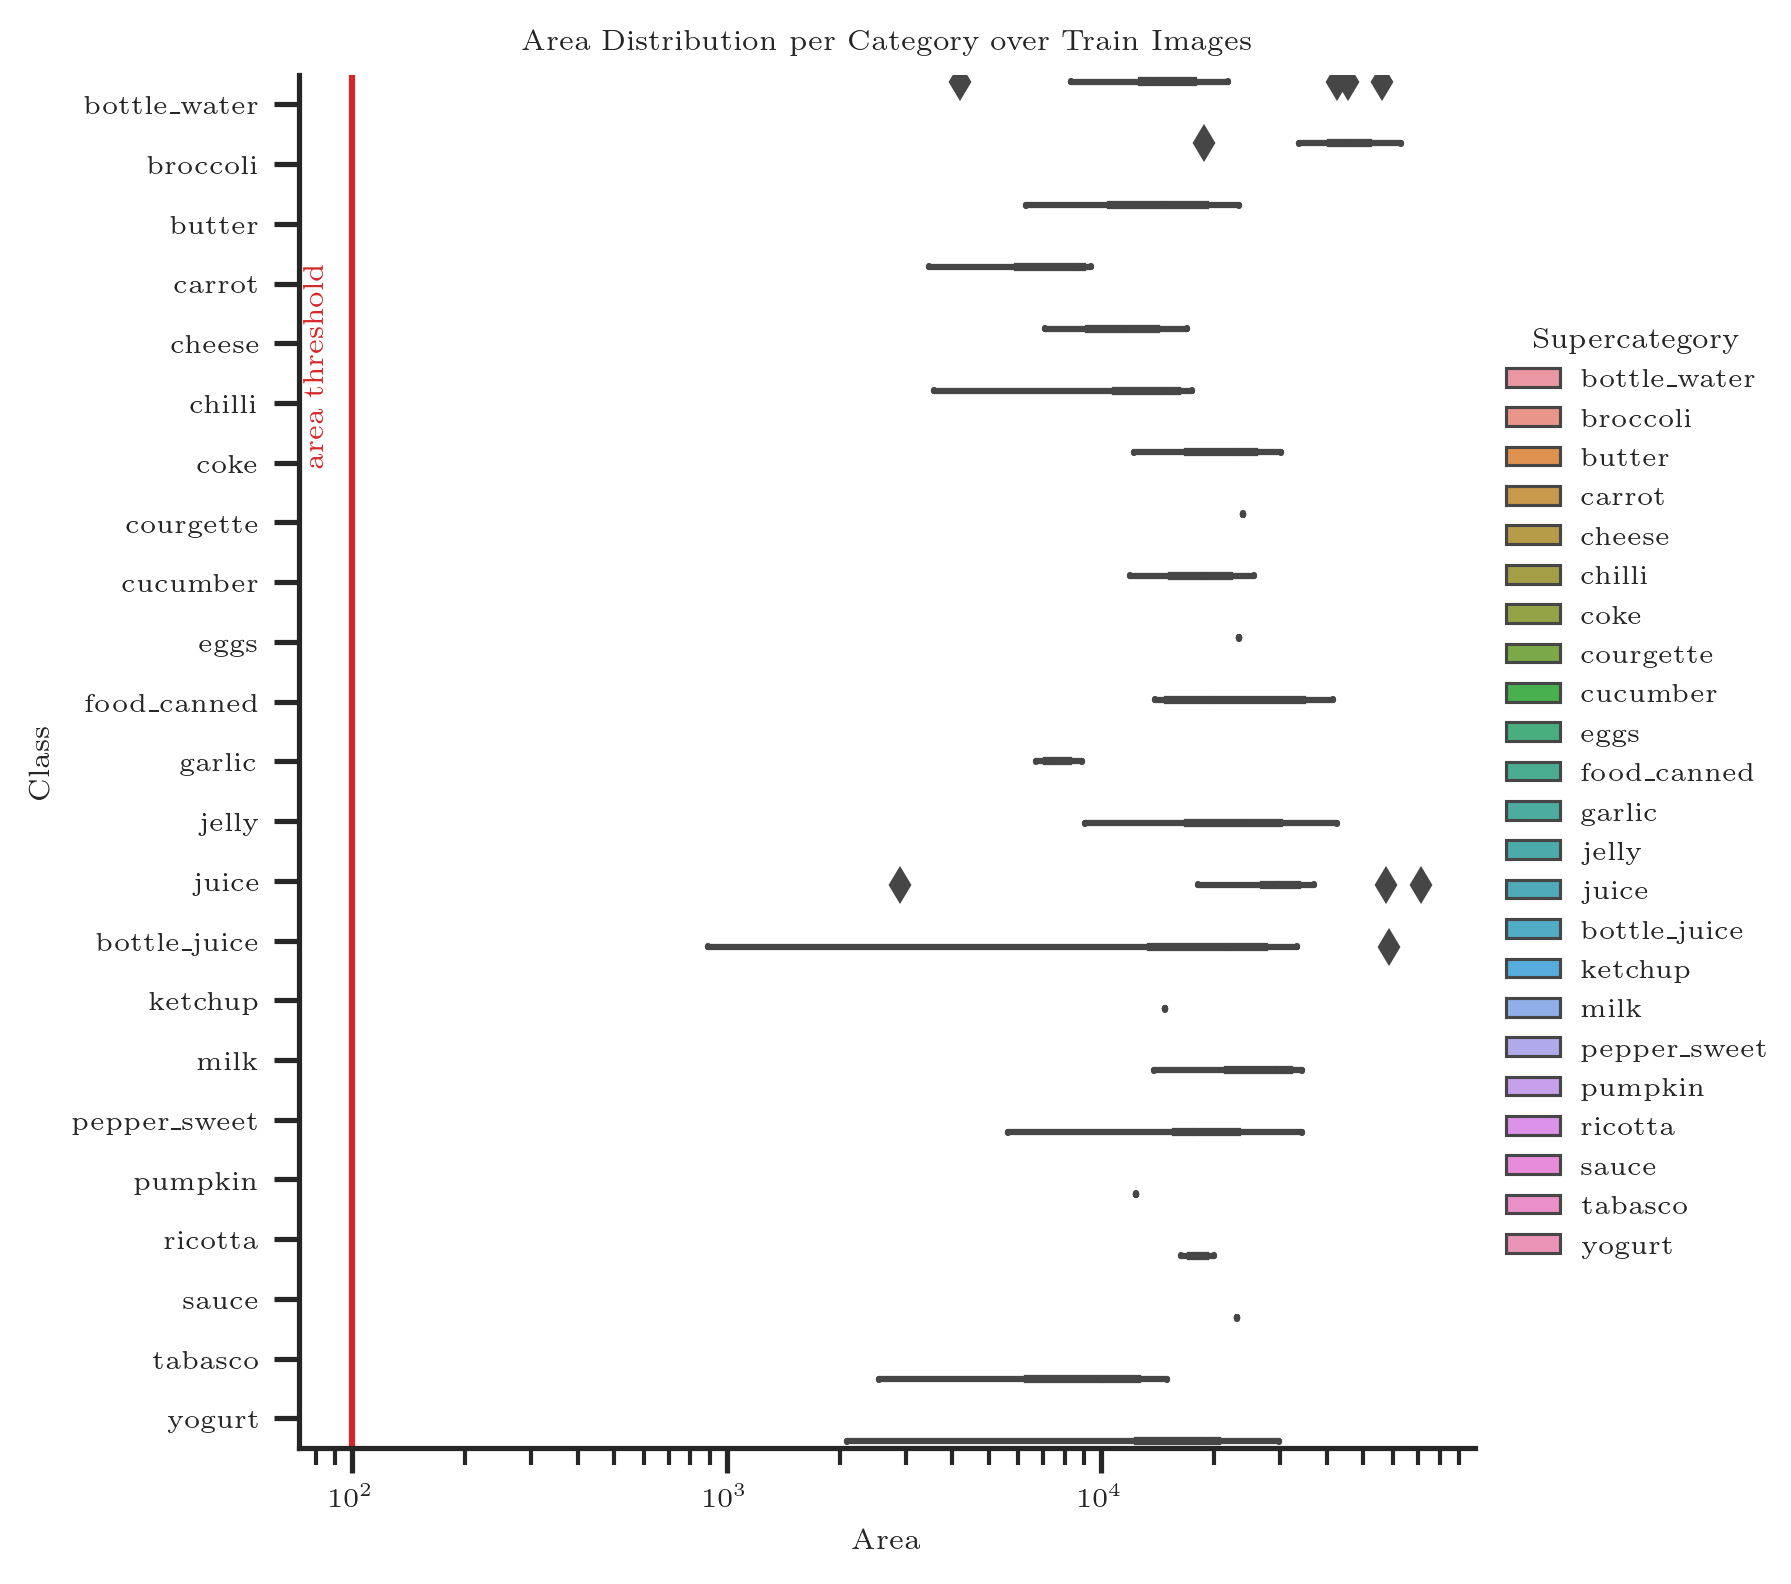

In [19]:
if df.shape[0]:
    to_defaults()

    figwidth = 252 #pt
    fs = 7 #pt
    f = "cm"
    ff = "serif"
    params = get_params("pdf", figwidth, "pt", ar="golden", f=f, fs=fs, ff=ff, show_dpi=300)
    set_style("paper", "ticks", params)
    sns.set_palette("colorblind")

    plt.figure()
    g = sns.catplot(x="area", y="cat", hue="supercat", data=df, kind="box")

    # Add vertical area threshold line
    plt.axvline(x=100, color=colors[3])
    ax = plt.gca()
    ax.text(100-20,6, "area threshold", color=colors[3], ha="center", rotation="vertical")

    g.set(xscale="log")
    g.legend.set_title("Supercategory")
    plt.title("Area Distribution per Category over Train Images")
    plt.xlabel("Area")
    plt.ylabel("Class")
    #plt.xlim([10,1000])
    plt.show()

### Image count

In [20]:
print(f"{ttype}/wholes: {len(dset)}")
if pdset:
    print(f"{ttype}/parts: {len(pdset)}")

test/wholes: 132

In [21]:
# Same image ids in dset and pdset
if pdset:
    print(set(dset.imgids) == set(pdset.imgids))

### Show random images

################################################################################

imgid: 126

number of anns: 2

yogurt is occluded.

################################################################################

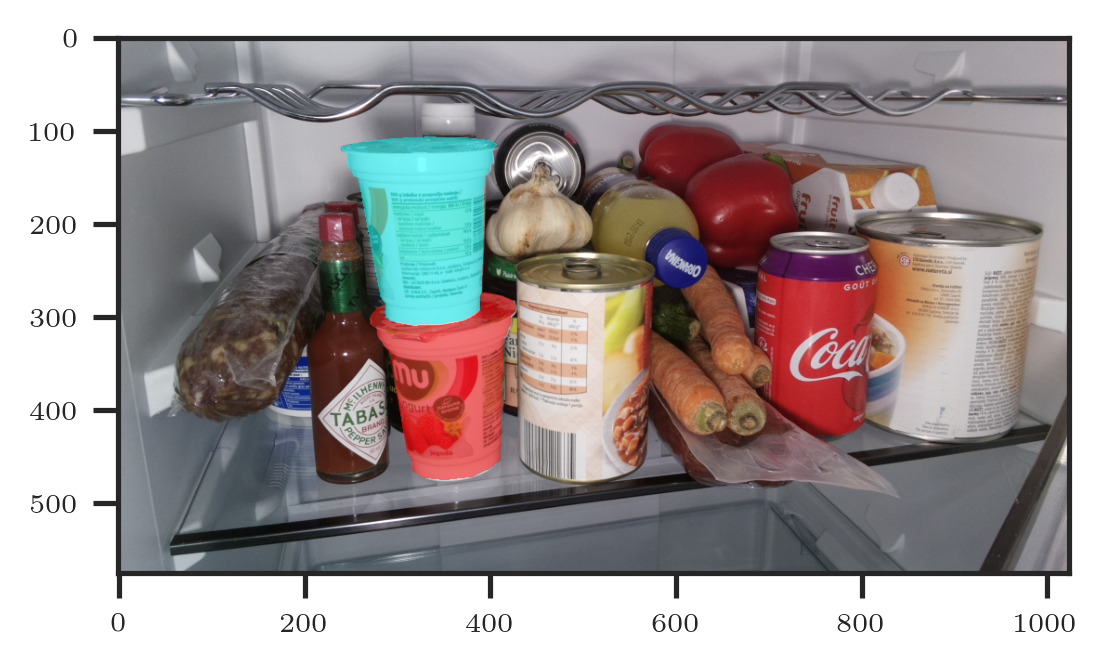

In [23]:
imgid = show_rand_img(dset, "yogurt")

In [24]:
if pdset:
    show_rand_img(pdset, "person", imgid)

### Check wholes parts connection

In [25]:
if parts_path.exists():
    coco = Parts2WholesDataset(CocoDataset(wholes_path, parts_path))
else:
    coco = Parts2WholesDataset(CocoDataset(wholes_path))

loading annotations into memory...

Loading json: /data/dataset/fridge/fridgenet-rdv3/annotations/test_wholes.json


Done 0.05s

creating index...
index created!


### Coco structure

In [26]:
print(f"cat: {coco.cats[1].keys()}")
print(f"whole ann: {coco.load_anninfos([1], from_gt=True)[0].keys()}")
print(f"part ann: {coco.load_anninfos([1], from_gt=False)[0].keys()}")
print(f"whole img: {coco.load_imginfos([1], from_gt=True)[0].keys()}")
print(f"whole img: {coco.load_imginfos([1], from_gt=False)[0].keys()}")

cat: dict_keys(['id', 'name', 'supercategory', 'is_whole', 'has_parts'])

whole ann: dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 
'iscrowd', 'is_occluded', 'occluders'])

part ann: dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 
'iscrowd', 'is_occluded', 'occluders'])

whole img: dict_keys(['id', 'width', 'height', 'file_name', 'license', 'flickr_url', 
'coco_url', 'date_captured', 'occupancy', 'iou'])

whole img: dict_keys(['id', 'width', 'height', 'file_name', 'license', 'flickr_url', 
'coco_url', 'date_captured', 'occupancy', 'iou'])

In [27]:
# Get all catids
catids = coco.get_catids(supercats=supercats)
print(catids)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 24, 25, 26, 27, 28, 29, 30, 31, 38, 39, 40, 52, 53, 54]

In [28]:
catids = coco.get_wholecat_ids(supercats)
print(catids)

[1, 8, 24, 29, 38, 52]